In [5]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [6]:
# Read data
df_ct_data = pd.read_csv("clinicaltrial_data.csv")
df_md_data = pd.read_csv("mouse_drug_data.csv")

In [7]:
# Merge datasets on Mouse ID to get Drug for each trial
df_ct_drug_data = pd.merge(df_ct_data, df_md_data, on="Mouse ID")
df_ct_drug_data = df_ct_drug_data.sort_values(["Timepoint", "Tumor Volume (mm3)"])

In [8]:
# Reset index, and get rid of original index column
df_ct_drug_data = df_ct_drug_data.reset_index()
df_ct_drug_data.drop(df_ct_drug_data.columns[0], axis=1, inplace=True)
df_ct_drug_data.head(30)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


In [9]:
drug1 = "Capomulin"
drug2 = "Infubinol"
drug3 = "Ketapril"
placebo = "Placebo"
color1 = "red"
color2 = "blue"
color3 = "green"
color4 = "black"

In [10]:
df_capomulin_data = df_ct_drug_data[df_ct_drug_data["Drug"] == "Capomulin"]
df_infubinol_data = df_ct_drug_data[df_ct_drug_data["Drug"] == "Infubinol"]
df_ketapril_data = df_ct_drug_data[df_ct_drug_data["Drug"] == "Ketapril"]
df_placebo_data = df_ct_drug_data[df_ct_drug_data["Drug"] == "Placebo"]

In [11]:
# Store timepoint values in an array
list_timepoints = df_ct_drug_data["Timepoint"].unique()

In [12]:
# For each drug, create Tumor Volume datasets for each timepoint 
tv_drug1 = [df_capomulin_data.loc[df_capomulin_data["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in list_timepoints]
tv_drug2 = [df_infubinol_data.loc[df_infubinol_data["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in list_timepoints]
tv_drug3 = [df_ketapril_data.loc[df_ketapril_data["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in list_timepoints]
tv_placebo = [df_placebo_data.loc[df_placebo_data["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in list_timepoints]

In [13]:
# For each drug, create Metastatic Sites datasets for each timepoint 
ms_drug1 = [df_capomulin_data.loc[df_capomulin_data["Timepoint"] == tp, "Metastatic Sites"] for tp in list_timepoints]
ms_drug2 = [df_infubinol_data.loc[df_infubinol_data["Timepoint"] == tp, "Metastatic Sites"] for tp in list_timepoints]
ms_drug3 = [df_ketapril_data.loc[df_ketapril_data["Timepoint"] == tp, "Metastatic Sites"] for tp in list_timepoints]
ms_placebo = [df_placebo_data.loc[df_placebo_data["Timepoint"] == tp, "Metastatic Sites"] for tp in list_timepoints]

In [14]:
# Create function to output Timepoint-grouped summary table for our 3 drugs and placebo - given a designated column to measure
def drug_summary_table(df, col):
    '''
    Function:   drug_summary_table
    Arguments:  Dataframe of average values by Timepoint, Column to measure
    Purpose:    Create a summary dataframe of our 3 drugs and placebo, with respective average values by Timepoint
    '''
    # Break down the above dataframe by the drugs we are concerned with
    df_drug1 = df[df["Drug"] == "Capomulin"]
    df_drug2 = df[df["Drug"] == "Infubinol"]
    df_drug3 = df[df["Drug"] == "Ketapril"]
    df_placebo = df[df["Drug"] == "Placebo"]
        
    # Merge the drug-specific dataframes into a summary dataframe, on the Timepoint column
    df_drug_summary = pd.merge(df_drug1, df_drug2, on="Timepoint")
    # Rename the columns so they match our drugs
    df_drug_summary = df_drug_summary.rename(columns={
                                                    f"{col}_x": "Capomulin",
                                                    f"{col}_y": "Infubinol"
                                                    }
                                            )
    df_drug_summary = pd.merge(df_drug_summary, df_drug3, on="Timepoint")
    df_drug_summary = pd.merge(df_drug_summary, df_placebo, on="Timepoint")
    # Rename the columns so they match our drugs
    df_drug_summary = df_drug_summary.rename(columns={
                                                    f"{col}_x": "Ketapril",
                                                    f"{col}_y": "Placebo"
                                                    }
                                            )
    # Drop the columns we don't need anymore
    df_drug_summary.drop(df_drug_summary.columns[[0,3,5,7]], axis=1, inplace=True)
  
    # Return dataframe
    return df_drug_summary

def scatter_plots(df, m, plot_title):
    '''
    Function:   scatter_plots
    Arguments:  Dataframe of data summary, Measurement, Plot Title, Drug 1 name, Drug 2 name, 
                 Drug 3 name, Placebo name
    Returns:    color
    Purpose:    Determine color of markers based on whether or not we measured tumor growth or reduction 
             (compare first value to last value)
    ''' 
    # ****** CREATE PLOT SERIES DATA *********
    # Create series' for the timepoint, as well as each drug's (and placebo's) Tumor or Metastatic Site changes over time
    timepoints = df.loc[:, "Timepoint"]
    s_drug1 = df.loc[:, drug1]
    s_drug2 = df.loc[:, drug2]
    s_drug3  = df.loc[:, drug3]
    s_placebo = df.loc[:, placebo]
    
    # ***** SET UP AXIS, AXIS TICKS, LABELS, LIMITS, AND TITLE ******
    # Set up ticks, limits, labels, and title
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(min(timepoints), max(timepoints)+1, 5))
    ax.tick_params(direction="out", color="black", width=1, length=5, axis="both", pad=2)
    ax.set_xlim(-1, max(timepoints) + 3)
    ax.set_xlabel("Time (Days)", fontsize=14)
    ax.set_ylabel(m, fontsize=14)   
    ax.set_title(plot_title, fontsize=18)
    ax.set_xmargin = 20
    # Add padding below and to left of the ticks in the axes
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.title.set_position([.5, 1.04])
    
    # ********* PLOTTING ***********
    # Build scatter plots, assigning handles for our legend based on colors above
    handle1 = ax.scatter(timepoints, s_drug1, facecolors=color1, marker="o", label=drug1)
    handle2 = ax.scatter(timepoints, s_drug2, facecolors=color2, marker="^", label=drug2)
    handle3 = ax.scatter(timepoints, s_drug3, facecolors=color3,  marker="s", label=drug3)
    handle4 = ax.scatter(timepoints, s_placebo, facecolors=color4, marker="D", label=placebo)
    
    # Build line plots on top of scatters with same colors as above
    ax.plot(timepoints, s_drug1, '--', color=color1, linewidth=1)
    ax.plot(timepoints, s_drug2, '--', color=color2, linewidth=1)
    ax.plot(timepoints, s_drug3, '--', color=color3, linewidth=1)
    ax.plot(timepoints, s_placebo, '--', color=color4, linewidth=1)

    # Define scatter plot legend
    ax.legend(handles=[handle1, handle2, handle3, handle4], loc='best', frameon=True, facecolor="white")

    # *********** ERROR BARS (for tumor growth, metastatic site data only) **********
    if (m != "Mouse Count"):
        # Build error bar means and standard error datasets
        if (m == "Tumor Volume (mm3)"):
            means_drug1   = [np.mean(c) for c in tv_drug1]
            means_drug2   = [np.mean(i) for i in tv_drug2]
            means_drug3   = [np.mean(k) for k in tv_drug3]
            means_placebo = [np.mean(p) for p in tv_placebo]
            se_drug1      = [sem(c) for c in tv_drug1]
            se_drug2      = [sem(i) for i in tv_drug2]
            se_drug3      = [sem(k) for k in tv_drug3]
            se_placebo    = [sem(p) for p in tv_placebo]
        elif (m == "Metastatic Sites"):
            # Define means and standard error margin values (for our error bars)
            means_drug1   = [np.mean(c) for c in ms_drug1]
            means_drug2   = [np.mean(i) for i in ms_drug2]
            means_drug3   = [np.mean(k) for k in ms_drug3]
            means_placebo = [np.mean(p) for p in ms_placebo]
            se_drug1      = [sem(c) for c in ms_drug1]
            se_drug2      = [sem(i) for i in ms_drug2]
            se_drug3      = [sem(k) for k in ms_drug3]
            se_placebo    = [sem(p) for p in ms_placebo]

        # Place error bars in axis
        ax.errorbar(timepoints, means_drug1, se_drug1, color=color1, fmt="o", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, means_drug2, se_drug2, color=color2, fmt="^", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, means_drug3, se_drug3, color=color3, fmt="s", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, means_placebo, se_placebo, color=color4, fmt="D", capsize=5, elinewidth=1, markeredgewidth=1)

In [15]:
# Set column to measure 
col_to_measure = "Tumor Volume (mm3)"

# Great a grouping dataframe to visualize average tumor growth over the course of the timepoints
drugs_grouping = df_ct_drug_data.groupby(["Drug", "Timepoint"])

# List the average Tumor Volume for our grouping in a dataframe
df_avg_tumorvolume_by_drug = pd.DataFrame(drugs_grouping[col_to_measure].mean()).reset_index()
df_avg_tumorvolume_by_drug.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [16]:
# Create drug summary table for Tumor Volume
df_volume_summary = drug_summary_table(df_avg_tumorvolume_by_drug, col_to_measure)
df_volume_summary.head(50)

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [17]:
# Call function to create scatter plots for Tumor Volume data
scatter_plots(df_volume_summary, col_to_measure, "Tumor Response to Treatment")

# Display scatter plot
plt.show()

NameError: name 'sem' is not defined

In [18]:
# Set column to measure
col_to_measure = "Metastatic Sites"

# Group our drug and timepoint data by the average # of metastatic sites
df_avg_mssites_by_drug = pd.DataFrame(drugs_grouping[col_to_measure].mean()).reset_index()
df_avg_mssites_by_drug.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [19]:
# Create drug summary table for Metastatic Sites
df_mssites_summary = drug_summary_table(df_avg_mssites_by_drug, col_to_measure)
df_mssites_summary.head(40)

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


In [20]:
# Call function to define scatter plot for Metastatic Site measurement
scatter_plots(df_mssites_summary, col_to_measure, "Metastatic Spread During Treatment")

# Display scatter plot
plt.show()

NameError: name 'sem' is not defined

In [21]:
# Group our drug and timepoint data by the average # mice still participating
df_avg_nummice_by_drug = pd.DataFrame(drugs_grouping["Tumor Volume (mm3)"].count()).reset_index()

# Rename aggregate column heading to make more sense
df_avg_nummice_by_drug = df_avg_nummice_by_drug.rename(columns={f"Tumor Volume (mm3)": "Mouse Count"})
df_avg_nummice_by_drug.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [22]:
# Create drug summary table for Metastatic Sites
df_mscount_summary = drug_summary_table(df_avg_nummice_by_drug, "Mouse Count")
df_mscount_summary.head(40)

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


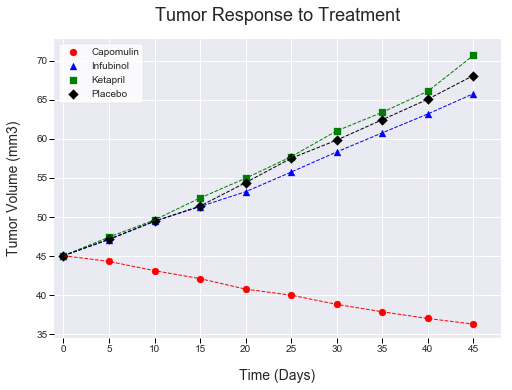

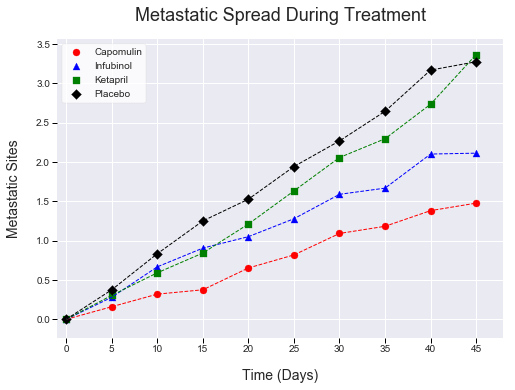

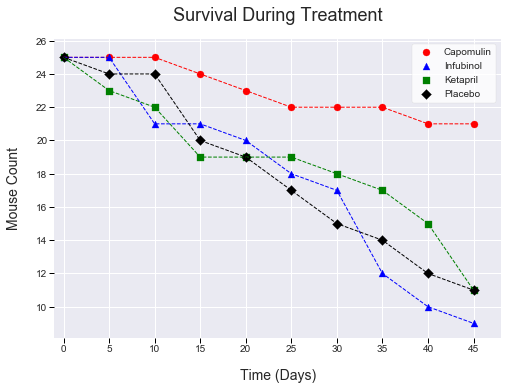

In [23]:
# Call function to define scatter plot for Metastatic Site measurement
scatter_plots(df_mscount_summary, "Mouse Count", "Survival During Treatment")

# Display scatter plot
plt.show()

In [24]:
# Build a series for each drug's % tumor volume change over the course of the timepoints
drug1_percentchange = (df_volume_summary[drug1][len(list_timepoints)-1] - df_volume_summary[drug1][0]) / df_volume_summary[drug1][0]
drug2_percentchange = (df_volume_summary[drug2][len(list_timepoints)-1] - df_volume_summary[drug2][0]) / df_volume_summary[drug2][0]
drug3_percentchange  = (df_volume_summary[drug3][len(list_timepoints)-1] - df_volume_summary[drug3][0]) / df_volume_summary[drug3][0]
placebo_percentchange   = (df_volume_summary[placebo][len(list_timepoints)-1] - df_volume_summary[placebo][0])  / df_volume_summary[placebo][0]

percent_change = pd.Series([drug1_percentchange, 
                            drug2_percentchange,
                            drug3_percentchange,
                            placebo_percentchange],
                           [drug1, drug2, drug3, placebo])
percent_change

Capomulin   -0.194753
Infubinol    0.461235
Ketapril     0.570288
Placebo      0.512980
dtype: float64

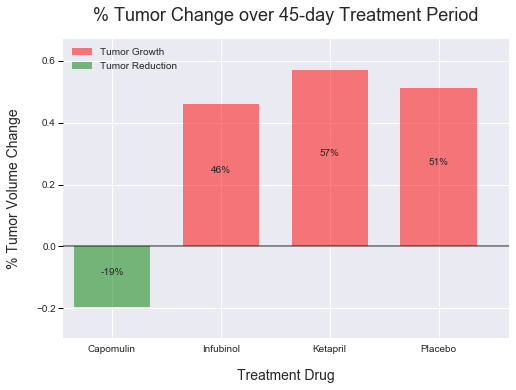

In [25]:
# Define our Bar chart 
x_axis = np.arange(0, 4, 1)
barwidth = 0.7       # the width of the bars

# Create our axis variable
fig, ax = plt.subplots()

# Define masks for coloring bars
mask_neg = percent_change < 0
mask_pos = percent_change >= 0

# Defint our bars
rects1 = ax.bar(x_axis[mask_pos], percent_change[mask_pos], color="red", alpha=0.5, align="edge", width=barwidth)
rects2 = ax.bar(x_axis[mask_neg], percent_change[mask_neg], color="green", alpha=0.5, align="edge", width=barwidth)

# Draw a horizontal line at y=0
ax.hlines(0, -0.1, 10, alpha=0.5)
    
# Set the limits of the x axis (with some whitespace to left and right)
ax.set_xlim(-0.1, len(x_axis))

# Set the limits of the y axis (add some whitespace to the top/bottom of the chart)
ax.set_ylim(min(percent_change) - .1, max(percent_change) + .1)

# add some text for labels, title and axes ticks
ax.set_ylabel("% Tumor Volume Change", fontsize=14)
ax.set_xlabel("Treatment Drug", fontsize=14)
ax.set_title("% Tumor Change over 45-day Treatment Period", fontsize=18)

# Create the ticks for our bar chart's x axis
ax.tick_params(direction="out", color="black", width=1, length=5, axis="y", pad=2)
ax.set_xticks([value+0.35 for value in x_axis])
ax.set_xticklabels(percent_change.index)

# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

# Add a legend for the red vs. green coloring
ax.legend((rects1[0], rects2[0]), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")

def autolabel(rects):
    '''
    Attach a text label above each bar displaying its height
    '''
    for rect in rects:
        height = rect.get_height() # Get the exact height of the bar
        height_formatted = "{0:.0f}%".format(rect.get_height() * 100)  # format it as a percentage for what to display
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height, height_formatted, ha='center', va='bottom')

# Add our percentage labels to our bars
autolabel(rects1)
autolabel(rects2)

# Display bar chart
plt.show()